# A. SOURCE DATA

Ultimate question to answer:

    1. We want to see if social media data can be used for S8 & S9 sales performance.
    2. Let’s limit the language to English so that you can use many existing English-based libraries.
    3. The scale is global but we could narrow down to US if needed.

In this project, we will cover:
    1. Measures of central tendency
    2. Measures of spread

In [226]:
# First, we import library that we need to work with.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

# Read data from csv

We limited data only to US region.
* gs = google search
* yt = youtube search

We collect dataset for 3 months from one month before lauching product date.

* df_s8_gs = dataset of samsung galaxy s8 from google search
* df_s9_gs = dataset of samsung galaxy s9 from google search

* df_s8_yt = dataset of samsung galaxy s8 from youtube search
* df_s9_yt = dataset of samsung galaxy s9 from youtube search

In [227]:
# To get raw data, there are several options:
# 1. Download directly data in (https://trends.google.com/trends)
# 2. Crawling with lib in python

df_s8_gs = pd.read_csv("raw_data/samsung_galaxy_s8_gs.csv", skiprows=1)
df_s9_gs = pd.read_csv("raw_data/samsung_galaxy_s9_gs.csv", skiprows=1)

df_s8_yt = pd.read_csv("raw_data/samsung_galaxy_s8_yt.csv", skiprows=1)
df_s9_yt = pd.read_csv("raw_data/samsung_galaxy_s9_yt.csv", skiprows=1)

Let see the first n rows for the objects based on position. For example: ten rows first

In [228]:
df_s9_gs.head(n=10)

,Day,samsung galaxy s9: (United States)
0,2017-11-16,25
1,2017-11-17,22
2,2017-11-18,25
3,2017-11-19,22
4,2017-11-20,24
5,2017-11-21,18
6,2017-11-22,17
7,2017-11-23,26
8,2017-11-24,31
9,2017-11-25,27


If you want to all file in table format, we can call this command

In [229]:
# HTML(df_s8_gs.to_html())
# HTML(df_s8_yt.to_html())

# Get information from data

In [254]:
shape_df_s8_gs = df_s8_gs.shape
shape_df_s8_yt = df_s8_yt.shape

shape_df_s9_gs = df_s9_gs.shape
shape_df_s9_yt = df_s9_yt.shape

print(shape_df_s8_gs)
print(shape_df_s9_gs)
print(shape_df_s8_yt)
print(shape_df_s9_yt)

(91, 1)
(93, 1)
(91, 1)
(93, 1)


From information above:

* df_s8_gs & df_s8_yt contains 91 rows and 2 columns
* df_s9_gs & df_s9_yt contains 93 rows and 2 columns

Next, we will check out data types and more in our dataframe:

In [231]:
df_s8_gs.info()
df_s8_yt.info()
df_s9_gs.info()
df_s9_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
Day                                   91 non-null object
samsung galaxy s8: (United States)    91 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
Day                                   91 non-null object
samsung galaxy s8: (United States)    91 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
Day                                   93 non-null object
samsung galaxy s9: (United States)    93 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
Day                                   93 non-null object
samsung galaxy s9: (United States)    93 non-n

# Accessing data in dataframes

For example, we want access data based on its location in the dataframe.
Imagine, its like matrix. The element consists of row and column.
We can use .iloc to access element in dataframe.

In [232]:
# We want know value of interest in certain date, for example : 2016-12-23
df_s8_gs.iloc[2,1]
# df_s8_gs.iloc[:,0]

16

# Handling Missing Data

Then, we check data, if is there possibility null value.
If null value exists in our data, we'll handling with substitute another value.

There several option for subtitute null value:
1. mean value
2. median value

In [233]:
# df_s8_gs.isnull()
# df_s9_gs.isnull()

From result, we know that there's no exist null or empty value in our data.

# B. WRANGLE DATA

Let first rename columns of our dataframe, so the column will be tidy and more easily to call.

In [234]:
df_s8_gs.columns = ["day", "interest_index_s8_gs"]
df_s9_gs.columns = ["day", "interest_index_s9_gs"]
df_s8_yt.columns = ["day", "interest_index_s8_yt"]
df_s9_yt.columns = ["day", "interest_index_s9_yt"]


Then we will convert column "day" to datetime type

In [235]:
df_s8_gs.day = pd.to_datetime(df_s8_gs.day)
df_s9_gs.day = pd.to_datetime(df_s9_gs.day)

df_s8_yt.day = pd.to_datetime(df_s8_yt.day)
df_s9_yt.day = pd.to_datetime(df_s9_yt.day)

df_s8_yt.head()

,day,interest_index_s8_yt
0,2016-12-21,15
1,2016-12-22,15
2,2016-12-23,16
3,2016-12-24,29
4,2016-12-25,0


In [236]:
df_s8_gs.day = pd.to_datetime(df_s8_gs.day)
df_s8_gs.set_index('day', inplace=True)

df_s9_gs.day = pd.to_datetime(df_s9_gs.day)
df_s9_gs.set_index('day', inplace=True)

df_s8_yt.day = pd.to_datetime(df_s8_yt.day)
df_s8_yt.set_index('day', inplace=True)

df_s9_yt.day = pd.to_datetime(df_s9_yt.day)
df_s9_yt.set_index('day', inplace=True)

# C. EXPLORATORY DATA ANALYSIS & VISUALIZATION

First, we will look at summary statistic of data

# Summary statistic df_s8_gs

In [237]:
mean_df_s8_gs = df_s8_gs["interest_index_s8_gs"].mean()
median_df_s8_gs = df_s8_gs["interest_index_s8_gs"].median()
mode_df_s8_gs = df_s8_gs["interest_index_s8_gs"].mode()
std_dev_df_s8_gs = df_s8_gs["interest_index_s8_gs"].std()

summary_df_s8_gs = df_s8_gs.describe()
summary_df_s8_gs

,interest_index_s8_gs
count,91.000000
mean,46.791209
std,20.090084
min,12.000000
25%,34.000000
50%,42.000000
75%,62.000000
max,100.000000


From summary_df_s8_gs:

1. Results indicated that "samsung galaxy s8" based google search had lowest search interest with value 12 and highest search interest with value 100 for three months latest.

2. We got that 25% of total data inside range of value 0-34, and 50% of total data inside range of value 

    * number row of our data = 91
    * Q1 = 34
    * Q2 = 42
    * Q3 = 62
    * IQR = Q3 - Q1 = 28
    * Mean = 46.79
    * Median = 42

In [238]:
number_df_s8_gs_below_mean = 0

for key, values in df_s8_gs.iteritems():
    if key == "interest_index_s8_gs":
        for value in values:
            if value < mean_df_s8_gs:
                number_df_s8_gs_below_mean += 1

print("Number data below mean score = {}".format(number_df_s8_gs_below_mean))


Number data below mean score = 50


(0.0, 30.0)

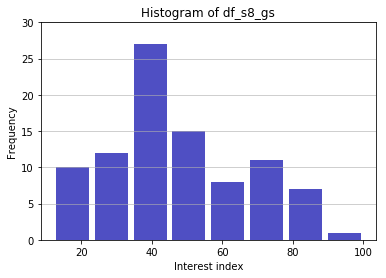

In [239]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=df_s8_gs["interest_index_s8_gs"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Interest index')
plt.ylabel('Frequency')
plt.title('Histogram of df_s8_gs')
maxfreq = n.max()

#Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

From result distribution above, we found that df_s8_gs is right skewed distribution (Positive skewness). Because the mean value is higher than mode & median value.

Text(0,0.5,u'Interest index')

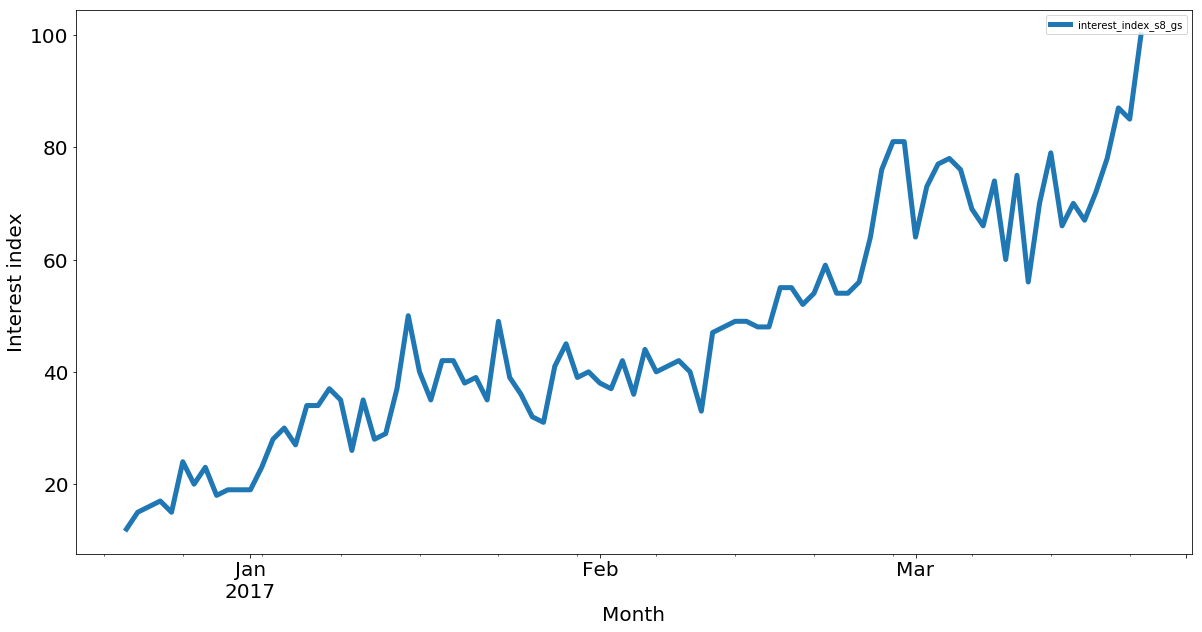

In [240]:
df_s8_gs.plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Interest index", fontsize=20)

# df_s8_gs["interest_index_s8_gs"].hist(bins=10)

* For the first month, (2016-12-21 to 2017-01-20), graphic shows tend to the increase of interest of index. While minimum value is 12 (at 2016-12-21) and maximum value is 50 (at 2017-01-15). For the minimum value is first month, actually is the absolute minimum value of dataset df_s8_gs. Total value of interest index in the first month is 867, with mean value is 27.97. From the mean value in first month, we know that the mean value is below the mean value of df_s8_gs (mean value is 46.79). For the first month, samsung galaxy s8 topic was not quite popular.

* For the second month, (2017-01-21 to 2017-02-20), the minimum value is 31 (at 2017-01-27) and the maximum value is 55 (at 2017-02-18). Tota value of interest index in the second month is 1324 and the mean value is 42.71. In the second month, we realized that the mean value increased about 52.7% from the mean value in the first month.

* Final, in the third month (2017-02-21 to 2017-03-21), the minimum value is 54 (at 2017-02-22) and the maximum value is (at 2017-03-21). The interest thing that all value in third month is above the mean value of total data set df_s8_gs, meanwhile the mean value of df_s8_gs is only 46.79. It's absolutely that all data in third month very affected the mean value and standar deviation of df_s8_gs. And for the mean value of third month is 71.28%. In the third month, the mean value is increased about 60% from the second month and 155% from the first month.

# Summary statistic df_s9_gs

In [241]:
mean_df_s9_gs = df_s9_gs["interest_index_s9_gs"].mean()
median_df_s9_gs = df_s9_gs["interest_index_s9_gs"].median()
mode_df_s9_gs = df_s9_gs["interest_index_s9_gs"].mode()
std_dev_df_s9_gs = df_s9_gs["interest_index_s9_gs"].std()

summary_df_s9_gs = df_s9_gs.describe()
summary_df_s9_gs

,interest_index_s9_gs
count,93.000000
mean,45.053763
std,24.270830
min,12.000000
25%,24.000000
50%,36.000000
75%,65.000000
max,100.000000


From summary_df_s9_gs:

1. Results indicated that "samsung galaxy s9" based google search result had lowest search interest with value 12 and highest search interest with value 100 for three months latest.

2. We got that 25% of total data inside range of value 0-34, and 50% of total data below value 36.

    * number row of our data = 93
    * Q1 = 24
    * Q2 = 36
    * Q3 = 65
    * IQR = Q3 - Q1 = 41
    * Mean = 45.05
    * Median = 36

In [242]:
number_df_s9_gs_below_mean = 0
print(mean_df_s9_gs)
for key, values in df_s9_gs.iteritems():
    if key == "interest_index_s9_gs":
        for value in values:
            if value < mean_df_s9_gs:
                number_df_s9_gs_below_mean += 1

print("Number data below mean score = {}".format(number_df_s9_gs_below_mean))

45.0537634409
Number data below mean score = 53


(0.0, 30.0)

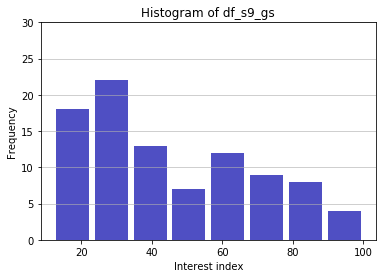

In [243]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=df_s9_gs["interest_index_s9_gs"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Interest index')
plt.ylabel('Frequency')
plt.title('Histogram of df_s9_gs')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

From result distribution above, we found that df_s9_gs is right skewed distribution (Positive skewness). Because the mean value is higher than mode & median value.

Text(0,0.5,u'Interest index')

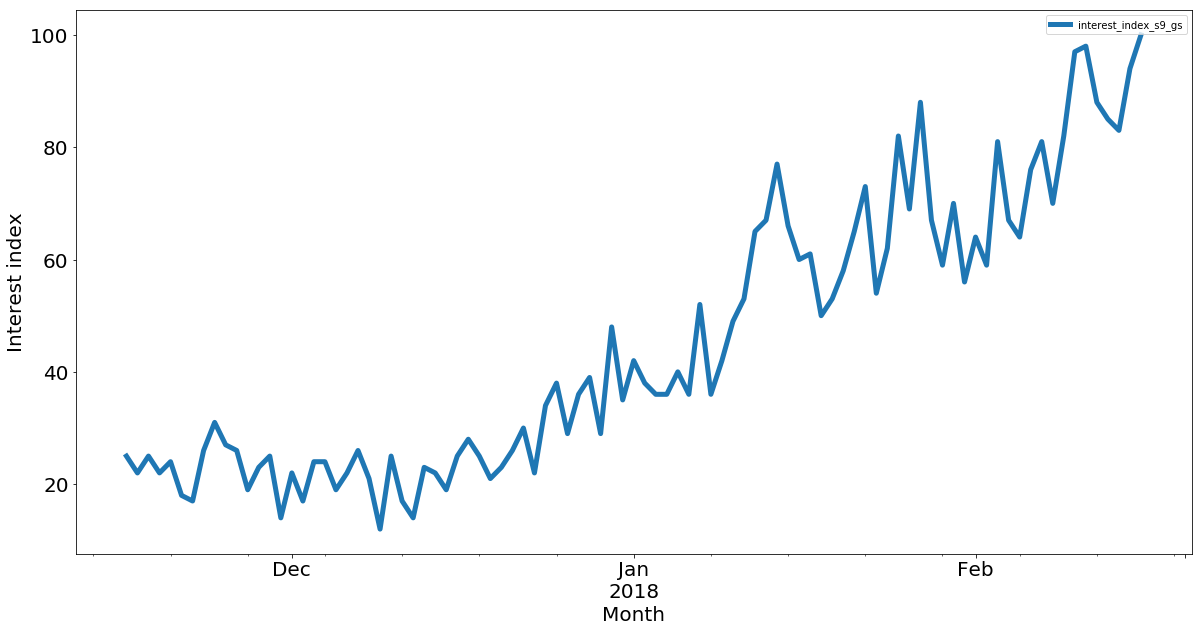

In [244]:
df_s9_gs.plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Interest index", fontsize=20)

* For the first month, (2017-11-16 to 2017-12-15), graphic shows tend to the increase of interest of index. While minimum value is 12 (at 2017-12-09) and maximum value is 50 (at 2017-11-24). For the minimum value is first month, actually is the absolute minimum value of dataset df_s9_gs. Total value of interest index in the first month is 651, with mean value is 21.7. From the mean value in first month, we know that the mean value is below the mean value of df_s9_gs (mean value is 45.05). For the first month, samsung galaxy s9 topic was not quite popular.

* For the second month, (2017-12-16 to 2018-01-15), the minimum value is 21 (at 2017-12-19) and the maximum value is 77 (at 2018-01-14). Total value of interest index in the second month is 1223 and the mean value is 39.45. It is impressive that there is significant inreasing of interest index in second month, with the peak value is 77 and it very affected the range value in the second month is 56. In the second month, the mean value increased about 81.8% from the mean value in the first month.

* Final, in the third month (2018-01-16 to 2018-02-16), the minimum value is 50 (at 2018-01-18) and the maximum value is (at 2018-02-16). The interest thing that all value in third month is above the mean value of total data set df_s9_gs, meanwhile the mean value of df_s9_gs is only 45.05. And for the mean value of third month is 72.38%. In the third month, the mean value is increased about 83.5% from the second month and 233% from the first month.

# Summary statistic df_s8_yt

In [245]:
mean_df_s8_yt = df_s8_yt["interest_index_s8_yt"].mean()
median_df_s8_yt = df_s8_yt["interest_index_s8_yt"].median()
mode_df_s8_yt = df_s8_yt["interest_index_s8_yt"].mode()
std_dev_df_s8_yt = df_s8_yt["interest_index_s8_yt"].std()

summary_df_s8_yt = df_s8_yt.describe()
summary_df_s8_yt
print(mean_df_s8_yt, median_df_s8_yt, mode_df_s8_yt)

(23.516483516483518, 21.0, 0    0
dtype: int64)


From summary_df_s8_yt:

1. Results indicated that "samsung galaxy s8" based youtube search had lowest search interest with value 0 and highest search interest with value 100 for three months latest.

2. We got that 25% of total data inside range of value 0-14.5, and 50% of total data below value 21. 

    * number row of our data = 91
    * Q1 = 14.5
    * Q2 = 21
    * Q3 = 31
    * IQR = Q3 - Q1 = 16.5
    * Mean = 23.52
    * Median = 21
    

In [246]:
number_df_s8_yt_below_mean = 0
for key, values in df_s8_yt.iteritems():
    if key == "interest_index_s8_yt":
        for value in values:
            if value < mean_df_s8_yt:
                number_df_s8_yt_below_mean += 1

print("Number data below mean score = {}".format(number_df_s8_gs_below_mean))

Number data below mean score = 50


(0.0, 30.0)

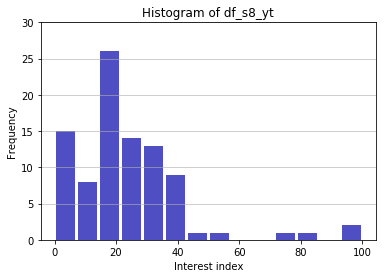

In [247]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=df_s8_yt["interest_index_s8_yt"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Interest index')
plt.ylabel('Frequency')
plt.title('Histogram of df_s8_yt')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

From result distribution above, we found that df_s8_yt is right skewed distribution (Positive skewness). Because the mean value is higher than mode & median value.

Text(0,0.5,u'Interest index')

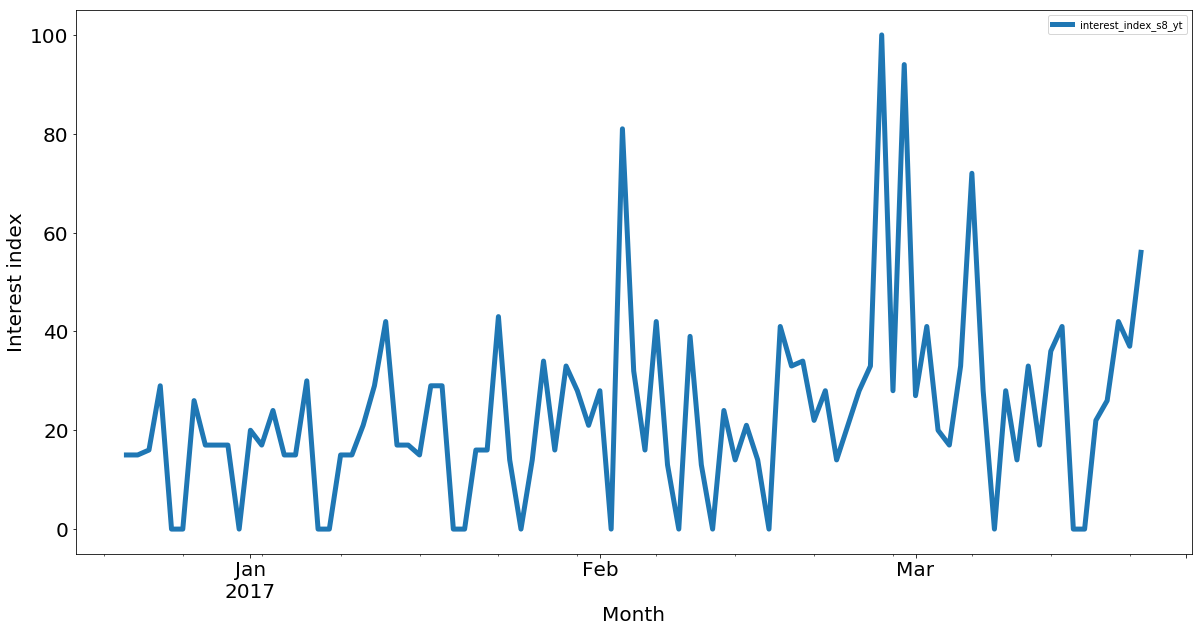

In [248]:
df_s8_yt.plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Interest index", fontsize=20)

* For the first month, (2016-12-21 to 2017-01-20), the minimum value is 0 (at 2016-12-21). This means that there isn't topic search about Samsung Galaxy S8 in youtube. And maximum value is 42 (at 2017-01-13). For the minimum value is first month, actually is the absolute minimum value of dataset df_s8_yt. The mean value of interest index in the first month is 16.19. From the mean value in first month, we know that the mean value is below the mean value of df_s8_yt (mean value is 23.51). For the first month, samsung galaxy s8 topic was not quite popular.

* For the second month, (2017-01-21 to 2017-02-20), the minimum value is 0 (at 2017-02-03) and the maximum value is 81 (at 2017-02-18). The mean value is 22.65. In the second month, we realized that the mean value increased about 40% from the mean value in the first month. Even the mean value is increased from the first month, the mean value of the second month is still below the mean value of df_s8_yt.

* Final, in the third month (2017-02-21 to 2017-03-21), the minimum value is 0 (at 2018-03-08) and the maximum value is (at 2017-02-26). The mean value of third month is 32.28. In the third month, the mean value is increased about 42.5% from the second month and 99.3% from the first month. The interest thing in the third month, even it is one month before, launching date product, there is several times, Samsung Galaxy S8 absolutely wasn't search in youtube.

 # Summary statistic df_s9_yt

In [249]:
mean_df_s9_yt = df_s9_yt["interest_index_s9_yt"].mean()
median_df_s9_yt = df_s9_yt["interest_index_s9_yt"].median()
mode_df_s9_yt = df_s9_yt["interest_index_s9_yt"].mode()
std_dev_df_s9_yt = df_s9_yt["interest_index_s9_yt"].std()

summary_df_s9_yt = df_s9_yt.describe()
summary_df_s9_yt

,interest_index_s9_yt
count,93.000000
mean,35.946237
std,20.560285
min,8.000000
25%,20.000000
50%,28.000000
75%,54.000000
max,100.000000


From summary_df_s9_yt:

1. Results indicated that "samsung galaxy s9" based youtube search had lowest search interest with value 8 and highest search interest with value 100 for three months latest.

2. We got that 25% of total data inside range of value 0-20, and 50% of total data below value 28. 

    * number row of our data = 93
    * Q1 = 20
    * Q2 = 28
    * Q3 = 54
    * IQR = Q3 - Q1 = 34
    * Mean = 35.95
    * Median = 28

In [250]:
number_df_s9_yt_below_mean = 0
for key, values in df_s9_yt.iteritems():
    if key == "interest_index_s9_yt":
        for value in values:
            if value < mean_df_s9_yt:
                number_df_s9_yt_below_mean += 1

print("Number data below mean score = {}".format(number_df_s8_gs_below_mean))

Number data below mean score = 50


(0.0, 30.0)

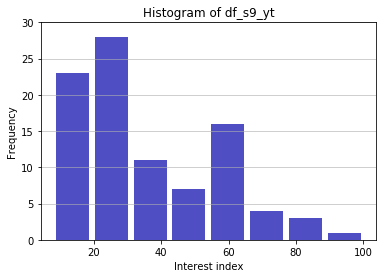

In [251]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=df_s9_yt["interest_index_s9_yt"], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Interest index')
plt.ylabel('Frequency')
plt.title('Histogram of df_s9_yt')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

From result distribution above, we found that df_s9_yt is right skewed distribution (Positive skewness). Because the mean value is higher than mode & median value.

Text(0,0.5,u'Interest index')

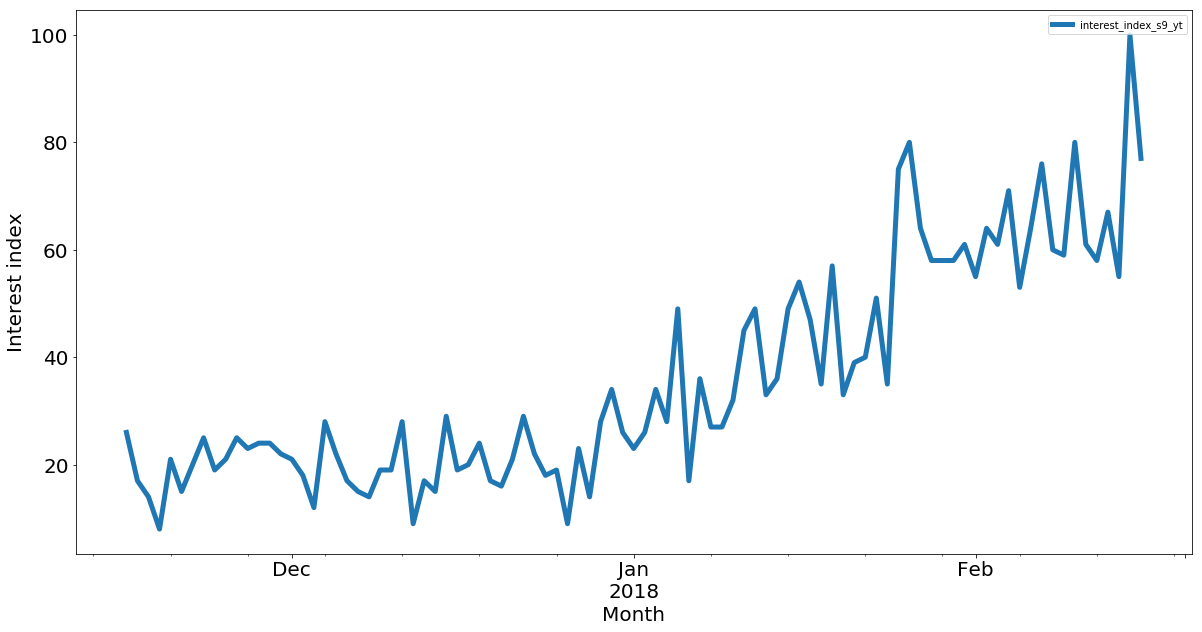

In [252]:
df_s9_yt.plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Interest index", fontsize=20)

* For the first month, (2017-11-16 to 2017-12-15), graphic shows tend to the increase of interest of index. While minimum value is 8 (at 2017-11-19) and maximum value is 29 (at 2017-12-15). For the minimum value is first month, actually is the absolute minimum value of dataset df_s9_yt. Total value of interest index in the first month is 587, with mean value is 19.57.

* For the second month, (2017-12-16 to 2018-01-15), the minimum value is 9 (at 2017-12-26) and the maximum value is 49 (at 2018-01-05). Total value of interest index in the second month is 850 and the mean value is 27.42. In the second month, the mean value increased about 40.1% from the mean value in the first month.

* Final, in the third month (2018-01-16 to 2018-02-16), the minimum value is 33 (at 2018-01-20) and the maximum value is 100 (at 2018-02-15). The mean value is 59.56. We found that the mean value in third month is very contrast to first month and second month. It was proved by the increase about 204% from the first month and about 117% from the second month. The interest thing (not to compare) that for there is not value 0 in df_s9_yt. It is indicated that at least topic Samsung Galaxy S9 had searched on youtube. 

# D. INSIGHT

1. We found that there is different tendency of popularity search between Samsung Galaxy S8 & Samsung Galaxy S9 topic in medial social.
    * For Samsung Galaxy S8 is tend to more popular in google search than youtube search. At least, we can take the mean value for the representation of data. The mean value in google search is 46.79. Meanwhile the mean value in youtube search is 23.51. We can see too that the trend graphic by google search tend to increase.
    * Different with Samsung Galaxy S8 topic, beside popular in google search. Samsung Galaxy S9 is quite popular in youtube search too. Although it's not fair to compair, at least Samsung Galaxy S9 always exist topic in youtube search every day. And for the representation of data, the mean value in google search is 45.05 and the mean value in youtube search is 35.95.

2. We found that in the third month (one month before launching product date) is the best month for each product. We mean that samsung galaxy s8 & samsung galaxy s9 topic are most searched in this month. It was proved by the mean value of third month is above the mean value of each total dataset.